In [1]:
%matplotlib notebook
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from mpl_toolkits.mplot3d import axes3d

# Dimension reduction tutorial

## Contents:
* [Preliminaries](#first-bullet)
* [Active subspaces](#second-bullet)
* [Zonotopes](#third-bullet)
* [Ridges](#fourth-bullet)

## Preliminaries <a class="anchor" id="first-bullet"></a>

Load the data. This is a very important step. Without this step, we can't move forward.

In [2]:
X = np.loadtxt('design_parameters.dat')
y = np.loadtxt('non_dimensionalized_efficiency.dat')
#title = 'Normalised pressure ratio'
title = 'Normalised efficiency'

Create a polynomial in 25-dimensions assuming each parameter is uniformly distributed between [-1,1]. Y'all have seen this before.

In [3]:
s = Parameter(distribution='uniform', lower=-1., upper=1., order=2)
myparameters = [s for _ in range(0, 25)]
mybasis = Basis('total-order')
mypoly = Poly(parameters=myparameters, basis=mybasis, method='least-squares', \
              sampling_args= {'mesh': 'user-defined', 'sample-points': X, 'sample-outputs': y})
mypoly.set_model()

## Active subspaces <a class="anchor" id="second-bullet"></a>

We pass the polynomial to `Subspaces`. It will use gradient approximations to compute the active subspace. 

In [4]:
mysubspace = Subspaces(full_space_poly=mypoly, method='active-subspace')
W = mysubspace.get_subspace()
e = mysubspace.get_eigenvalues()

<IPython.core.display.Javascript object>


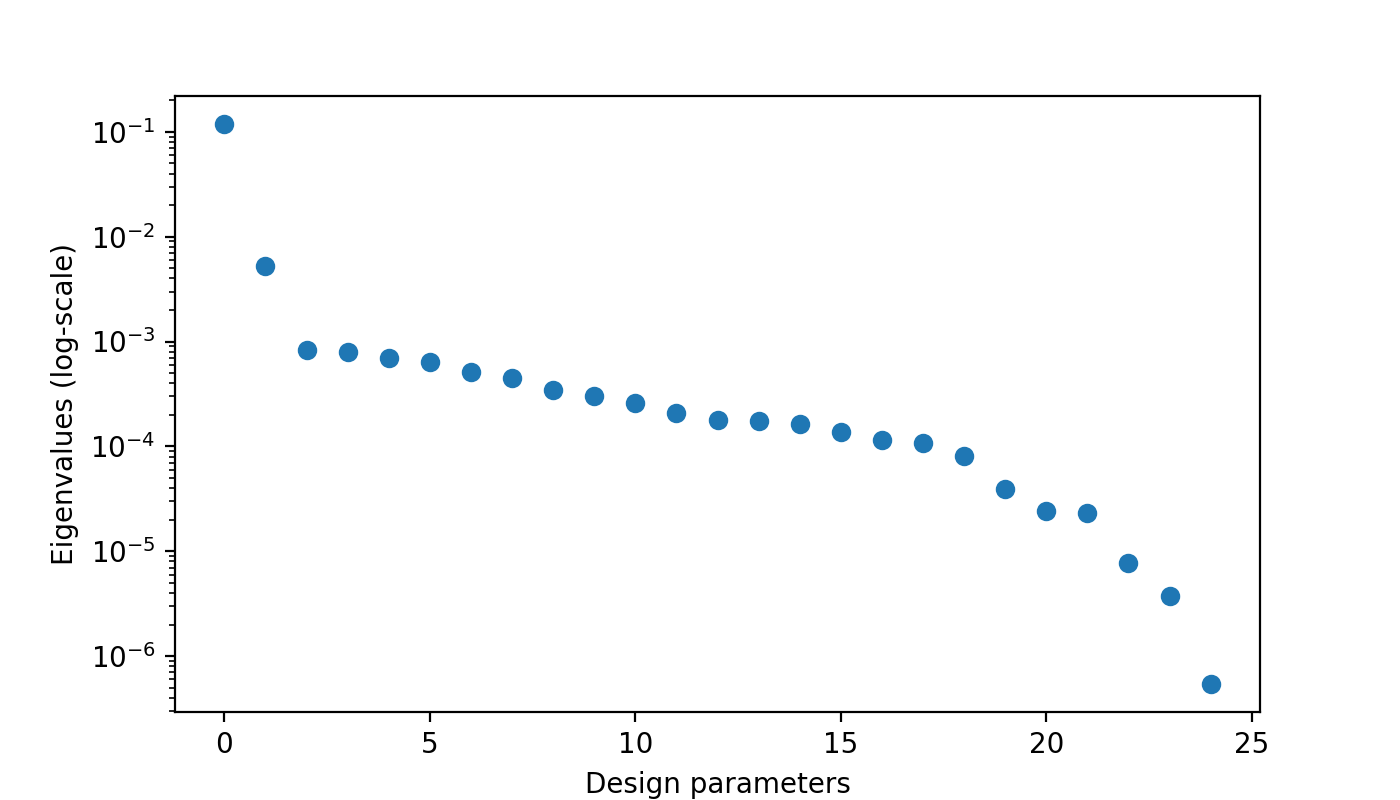

In [5]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
plt.semilogy(e, 'o')
plt.ylabel('Eigenvalues (log-scale)')
plt.xlabel('Design parameters')
plt.show()

In [6]:
true_dimensions = 1
u = X @ W[:, 0:true_dimensions] 

<IPython.core.display.Javascript object>


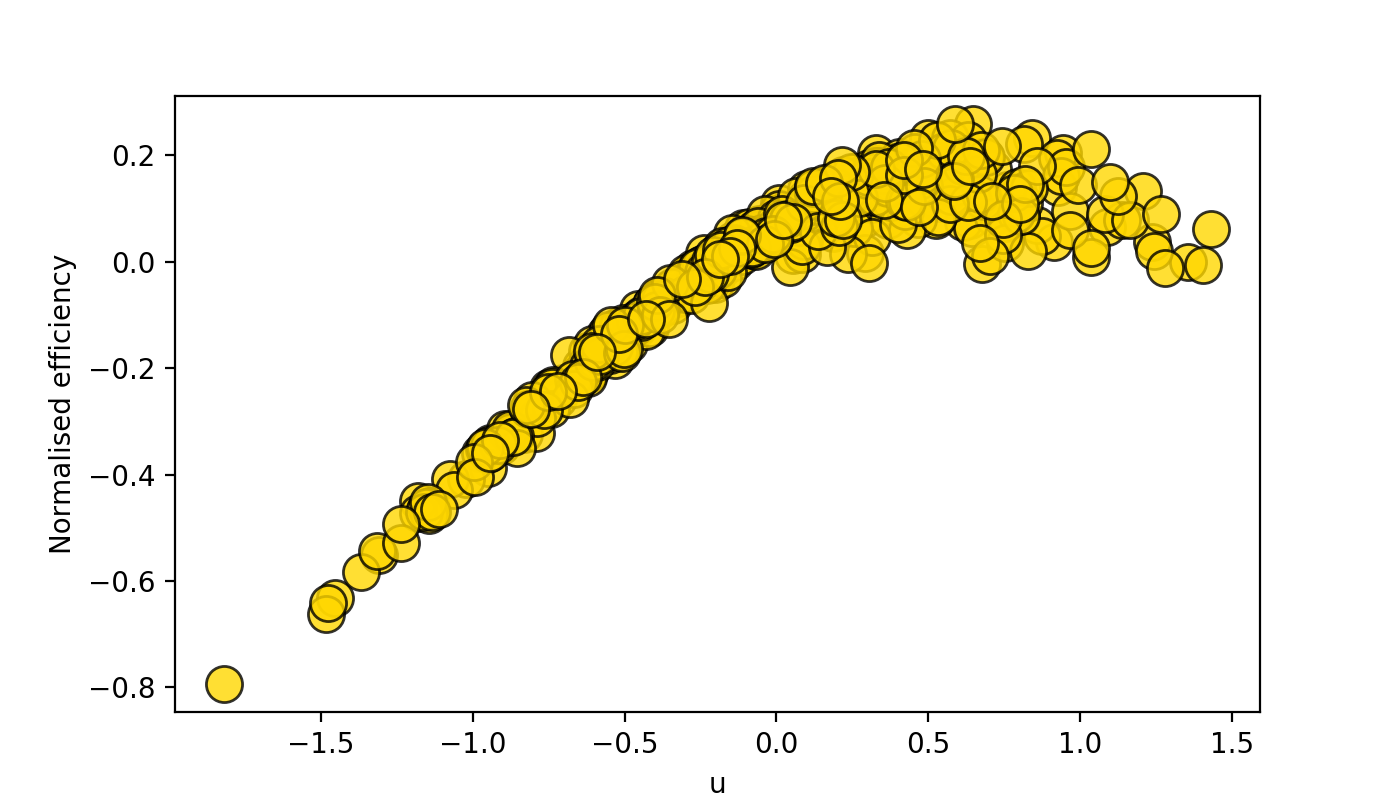

In [7]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
plt.plot(u[:,0], y, 'o', color='gold', markeredgecolor='k', lw=1, ms=13, alpha=0.8)
plt.ylabel(title)
plt.xlabel('u')
plt.show()

In [8]:
true_dimensions = 2
u = X @ W[:, 0:true_dimensions] 

<IPython.core.display.Javascript object>


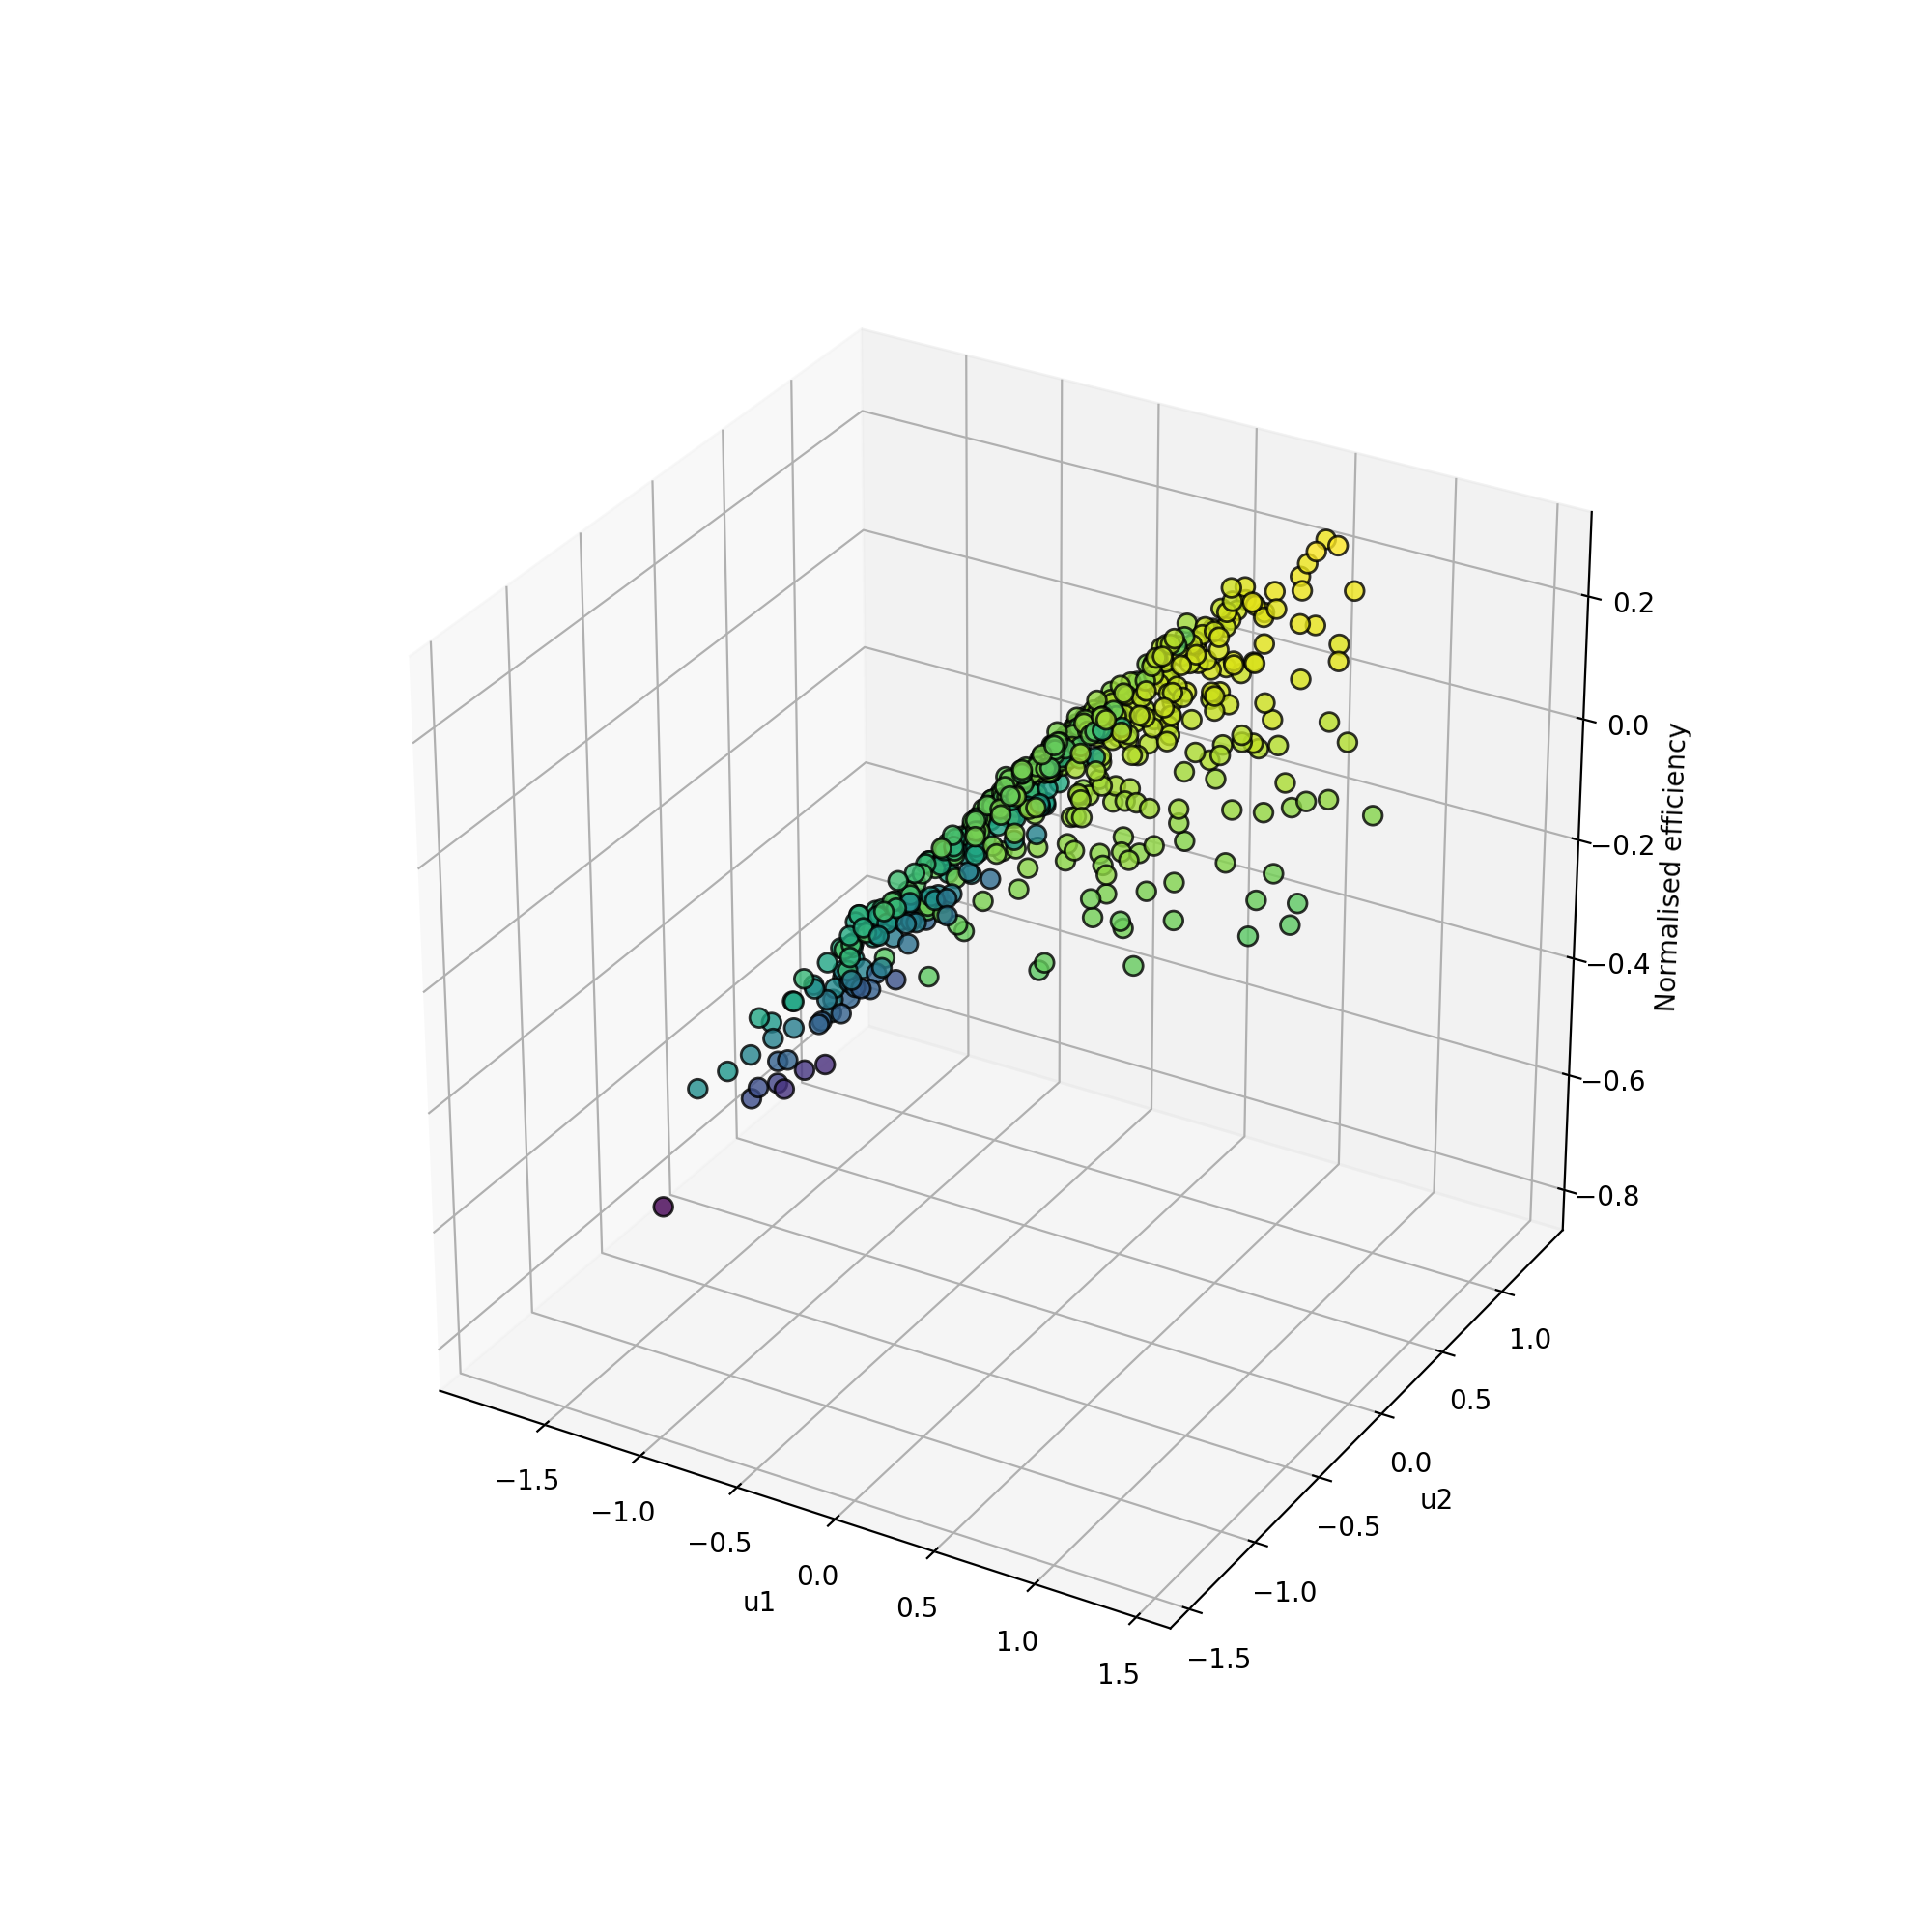

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0],u[:,1], y, s=50, c=y, marker='o', edgecolor='k', lw=1, alpha=0.8)                                                                               
ax.set_xlabel('u1')
ax.set_ylabel('u2')
ax.set_zlabel(title)
plt.show()

## Zonotopes <a class="anchor" id="third-bullet"></a>

What is the projection of a hypercube on a plane?

In [10]:
d = 500 # number of dimensions
N = 1000 # number of samples
W = np.random.rand(d,d)
Q, _ = np.linalg.qr(W) # makes the random matrix orthogonal!
mysubspace._subspace = Q
mysubspace.subspace_dimension = 2
Z = np.random.rand(N,d)*2. - 1

<IPython.core.display.Javascript object>


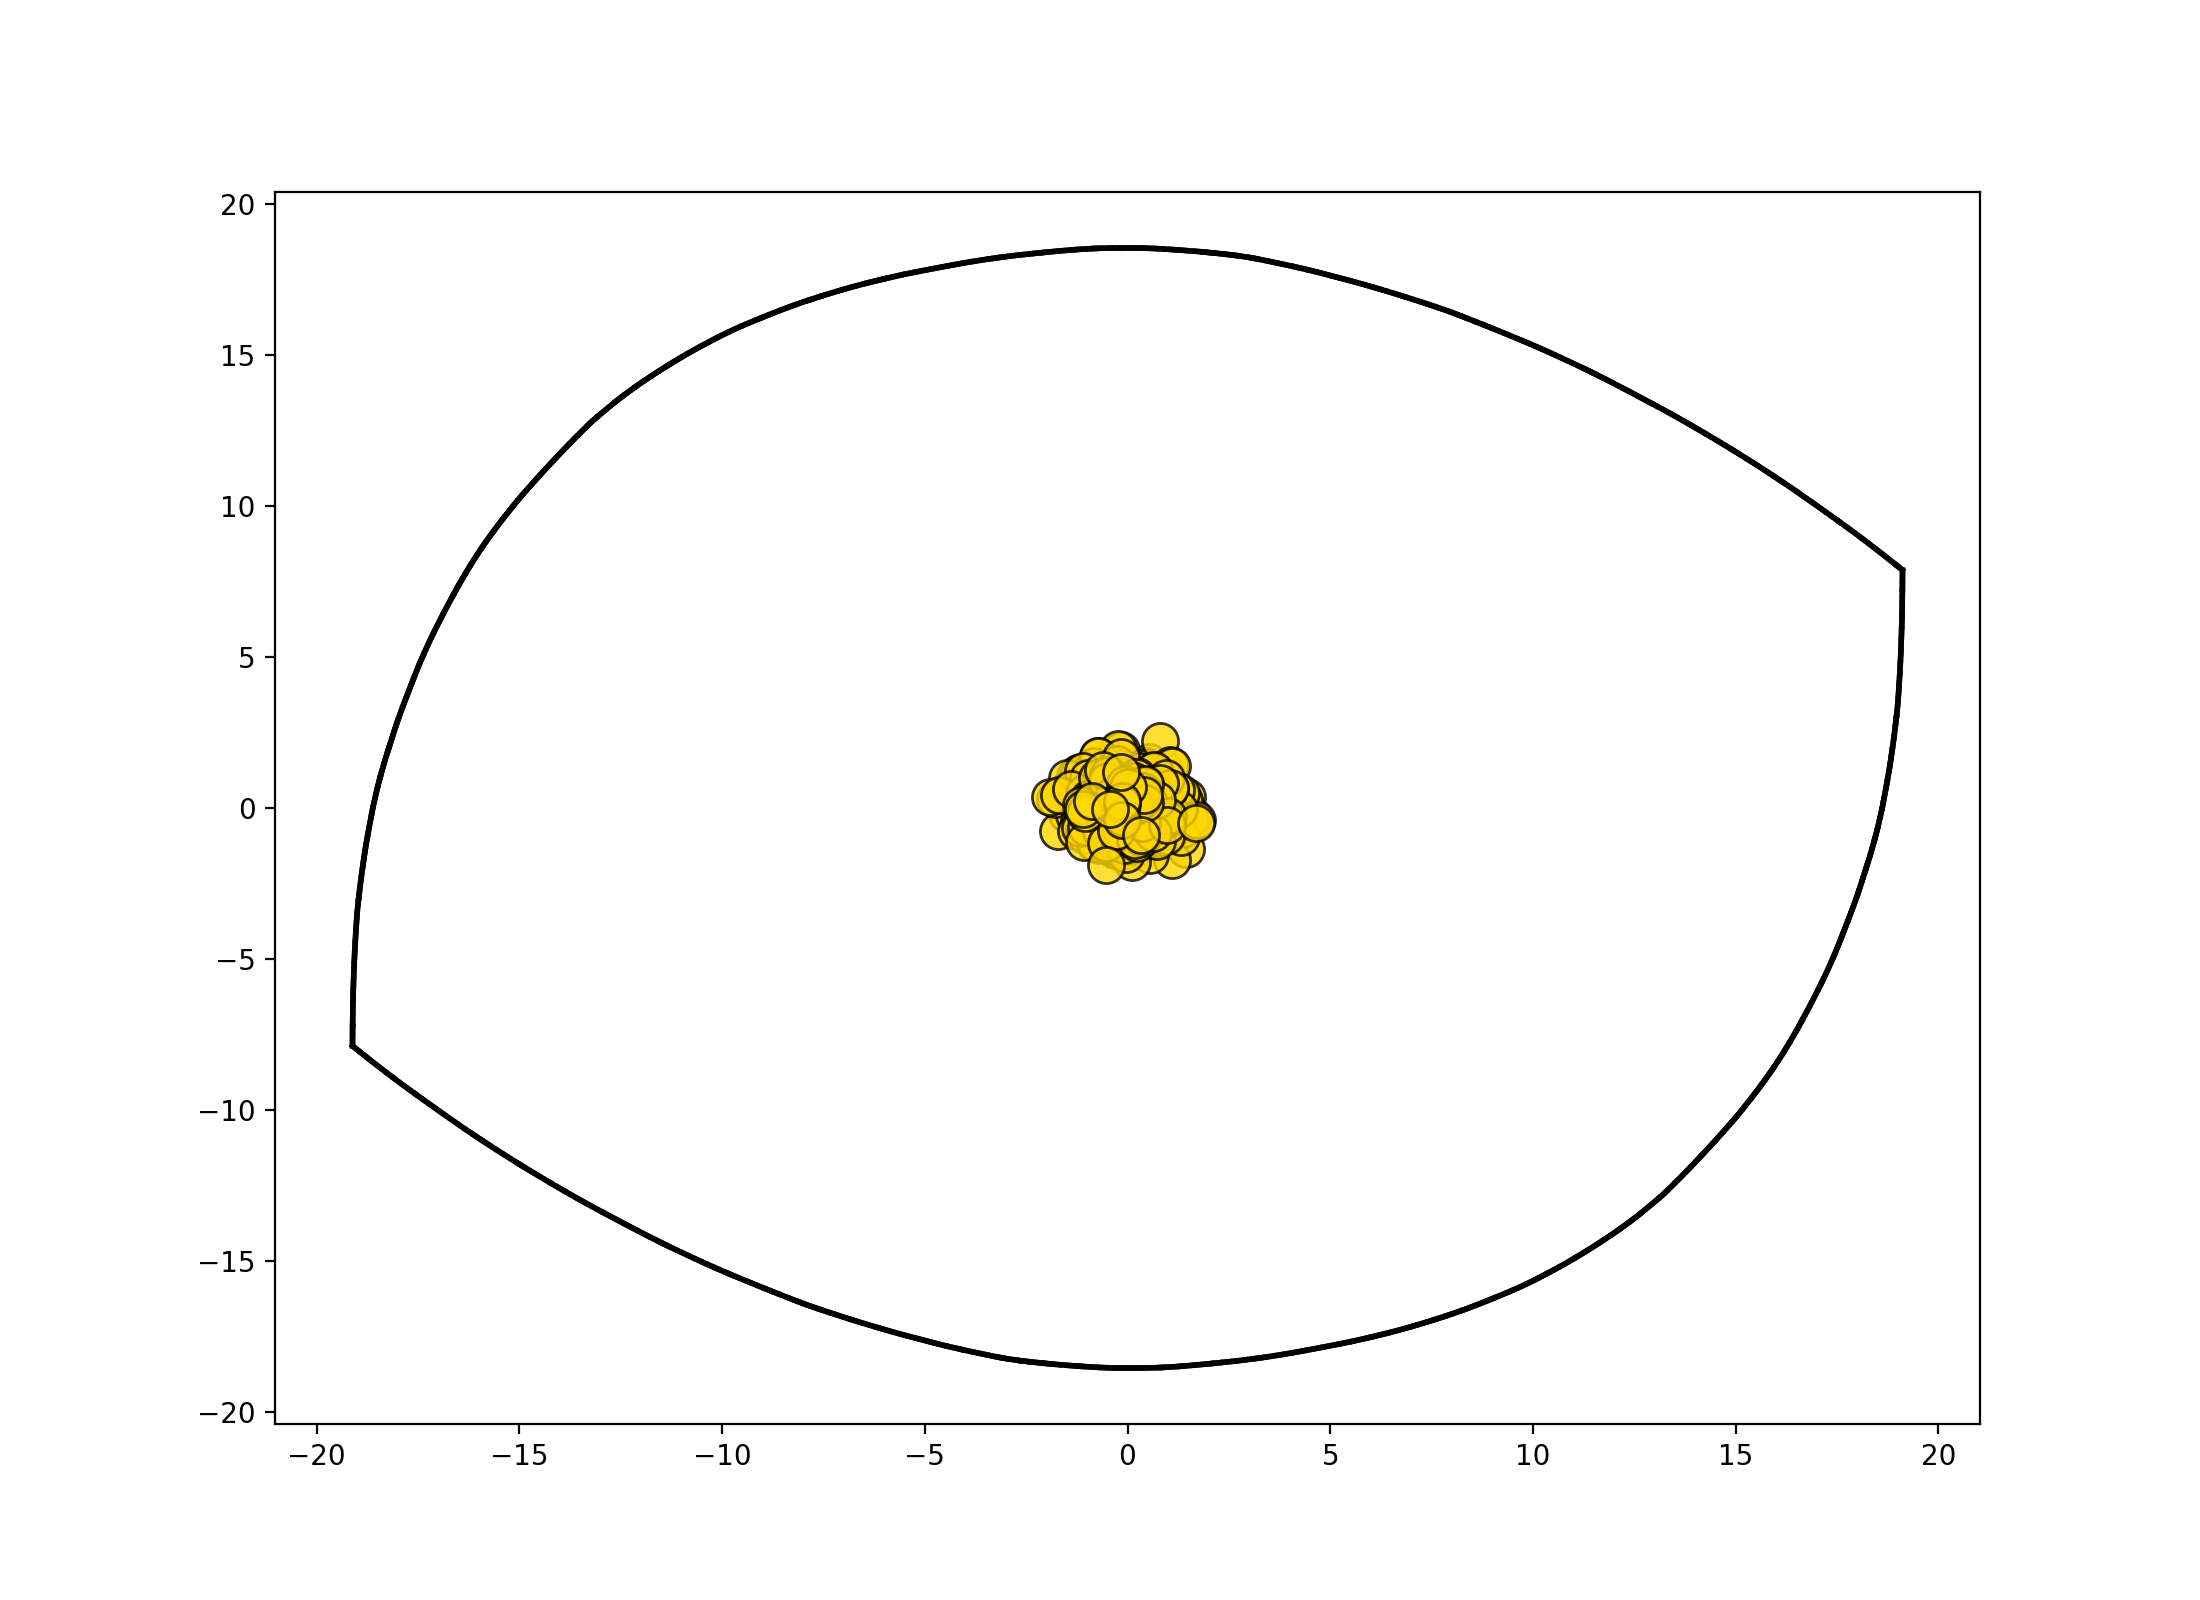

In [11]:
z = Z @ Q[:,0:2] # Projecting on 2D space only!
pts = mysubspace.get_zonotope_vertices()
hull = ConvexHull(pts)

# Plot
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
plt.plot(z[:,0], z[:,1], 'o', color='gold', markeredgecolor='k', lw=1, ms=13, alpha=0.8)
for simplex in hull.simplices:
    plt.plot(pts[simplex, 0], pts[simplex, 1], 'k-', lw=2)
plt.show()

Play around with both the dimension of the full space and the number of samples. What do you observe?

## Ridges <a class="anchor" id="fourth-bullet"></a>

In practice we may not have enough evaluations to estimate a global polynomial. So ridge approximations are a powerful set of ideas for dimension reduction. The technique we use here is titled variable projection.

In [12]:
mysubspace = Subspaces(method='variable-projection', sample_points=X, sample_outputs=y)
W = mysubspace.get_subspace()
true_dimensions = 1
u = X @ W[:, 0:true_dimensions] 

<IPython.core.display.Javascript object>


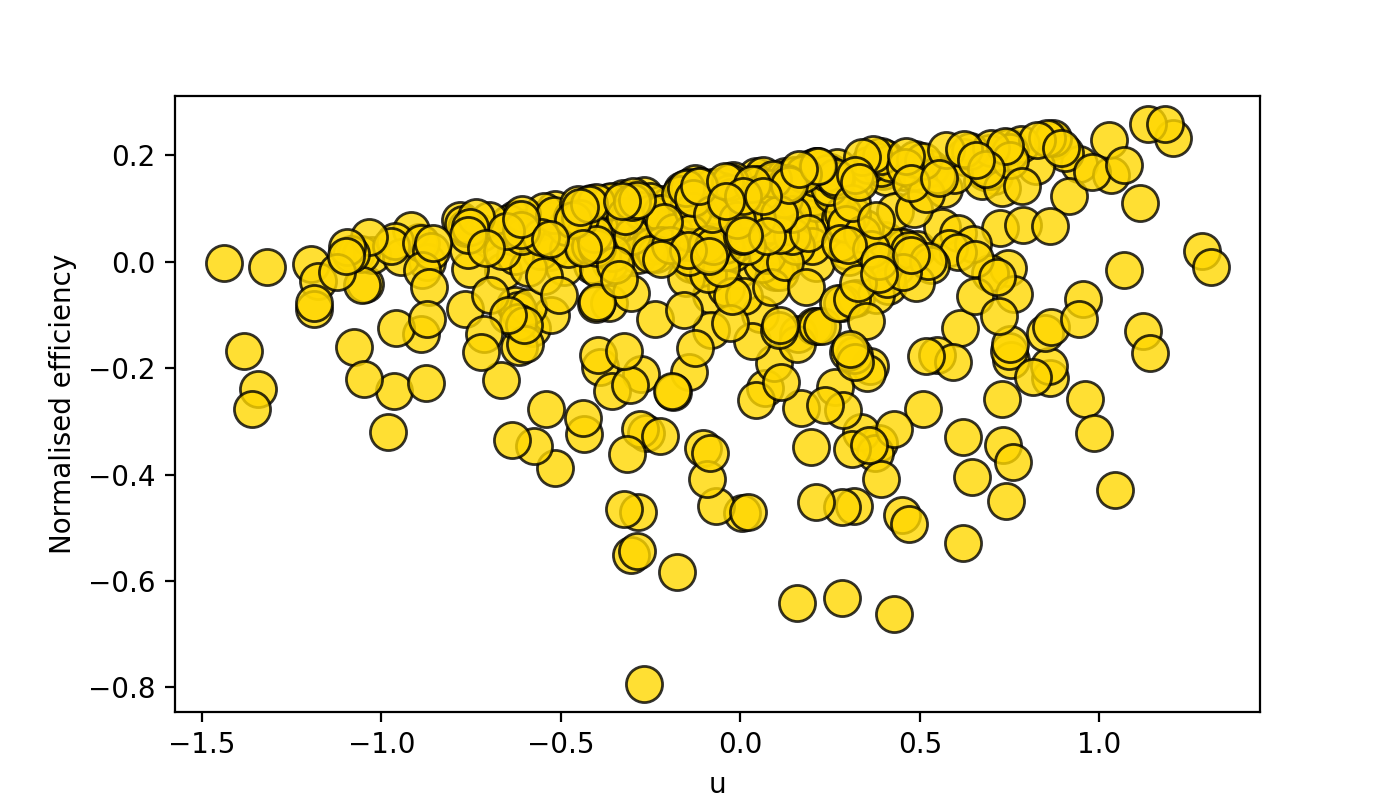

In [13]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
plt.plot(u[:,0], y, 'o', color='gold', markeredgecolor='k', lw=1, ms=13, alpha=0.8)
plt.ylabel(title)
plt.xlabel('u')
plt.show()

In [14]:
true_dimensions = 2
u = X @ W[:, 0:true_dimensions] 

<IPython.core.display.Javascript object>


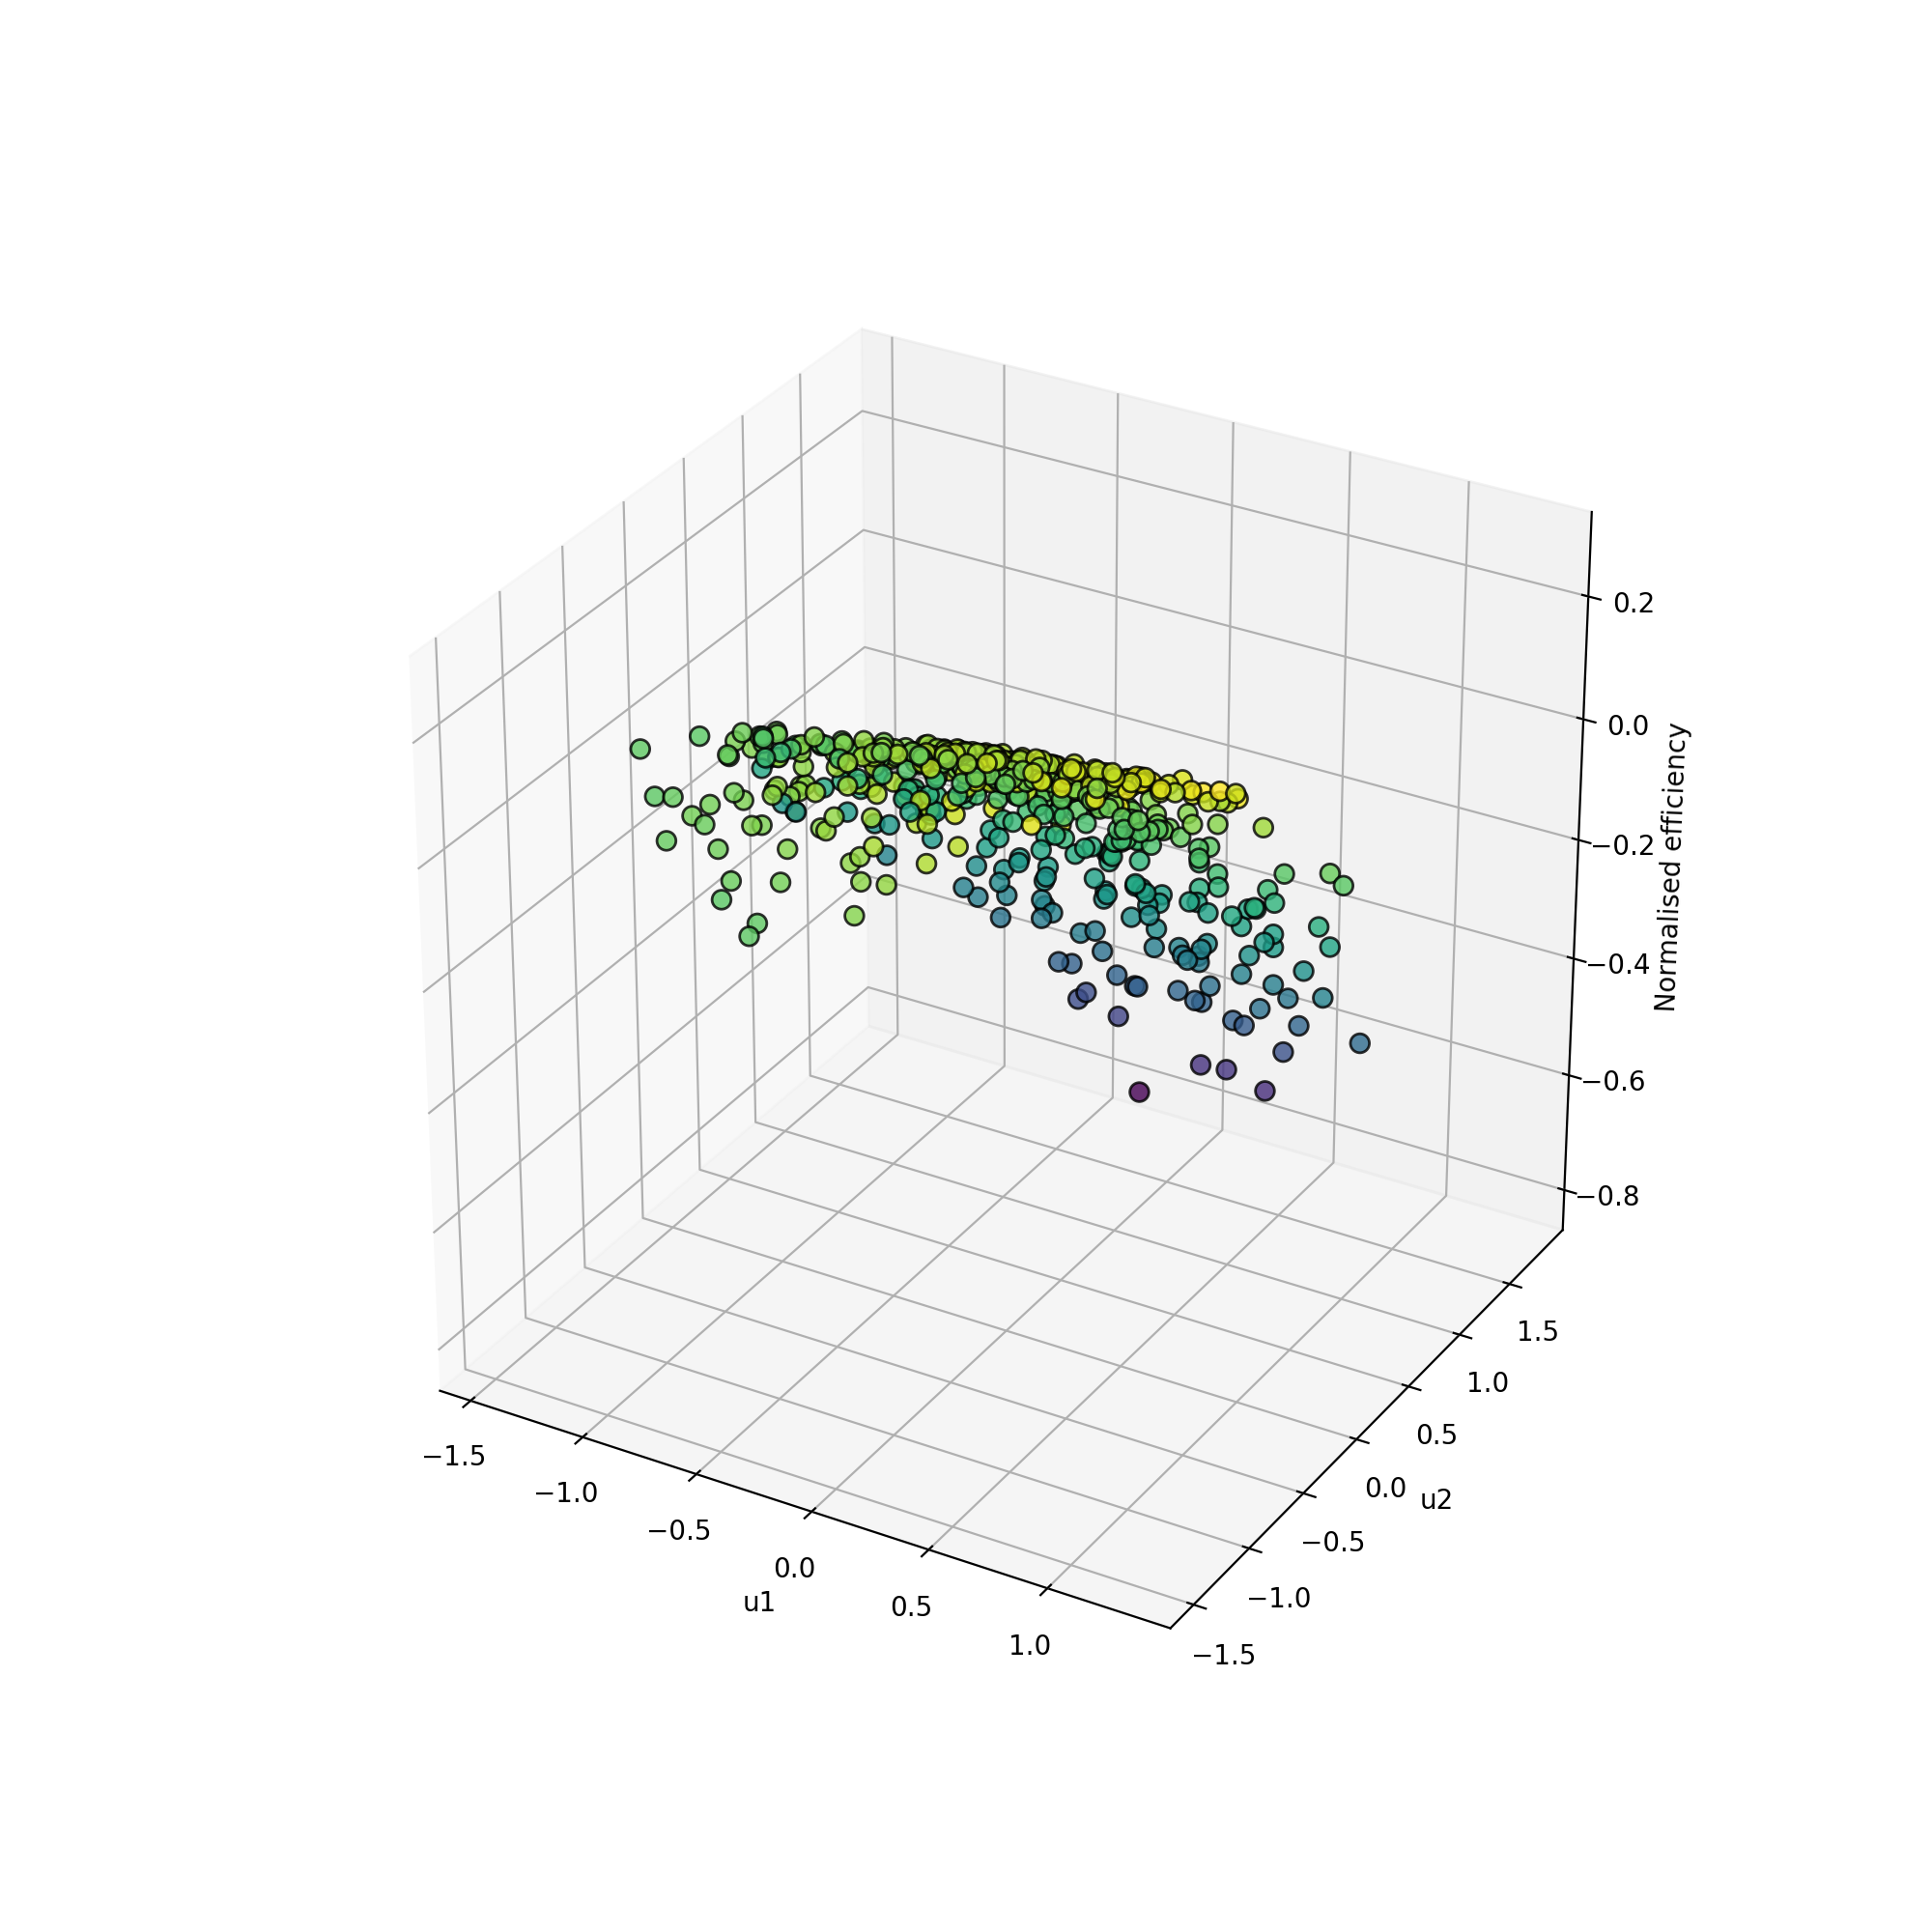

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0],u[:,1], y, s=50, c=y, marker='o', edgecolor='k', lw=1, alpha=0.8)                                                                               
ax.set_xlabel('u1')
ax.set_ylabel('u2')
ax.set_zlabel(title)
plt.show()